In [1]:
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import requests
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf

In [2]:
#Creat a function to calucalte stock/market return caompare value with previuos one
def Return_Rate(x,y,z):
  x = x.rename(columns = {"Adj Close": y})
  x["Date"] = pd.to_datetime(x["Date"])
  x[y] = pd.to_numeric(x[y])
  x["REF"] = x[y].shift(periods=1)
  x[z] = (x[y]-x["REF"])/x["REF"]
  x = x.dropna()
  x = x[["Index", "Date",y,"REF", z]]
  return x

In [3]:
# Create a function to calculate the market/stock premium
# by taking the market/stock return and subtracting the risk free return
# Manipulating the data to fit our format by renaming columns
def Premium_with_risk_free(x, y, z, a):
  x = pd.merge(y, Risk_Free, on = "Date")
  x[z] = x[a]- x["Risk-Free Return"]
  x[z] = pd.to_numeric(x[z])
  x["Compound Rate_0"] = (1+x[z])
  x["Compound Rate"] = x["Compound Rate_0"].cumprod()
  x["Investment"] = 1000*["Compound Rate"]
  x = x[["Date", "Risk-Free Return", z, "Compound Rate_0","Compound Rate", "Investment"]]
  x = x.rename(columns = {"Date_y":"Date"})
  return x

In [4]:
#History Data Time Frame
Startdate = "2003-01-01"
Enddate = "2023-01-02"

Startdate = pd.to_datetime(Startdate)
Enddate = pd.to_datetime(Enddate)

In [5]:
TB30 = yf.download("^TYX",start=Startdate,end=Enddate, interval='1mo')
TB30.insert(0, "Index", range(1, 1 + len(TB30)))

[*********************100%%**********************]  1 of 1 completed


In [6]:
Risk_Free = TB30
Risk_Free = Risk_Free.reset_index(drop=False)

Risk_Free.tail(100)

,Date,Index,Open,High,Low,Close,Adj Close,Volume
141,2014-10-01,142,3.184,3.276,2.677,3.060,3.060,0
142,2014-11-01,143,3.053,3.133,2.905,2.910,2.910,0
143,2014-12-01,144,2.886,3.016,2.687,2.749,2.749,0
144,2015-01-01,145,2.769,2.782,2.226,2.251,2.251,0
145,2015-02-01,146,2.254,2.746,2.235,2.600,2.600,0
...,...,...,...,...,...,...,...,...
236,2022-09-01,237,3.335,3.847,3.335,3.765,3.765,0
237,2022-10-01,238,3.694,4.425,3.639,4.204,4.204,0
238,2022-11-01,239,4.065,4.334,3.703,3.822,3.822,0
239,2022-12-01,240,3.683,3.990,3.413,3.975,3.975,0


In [7]:
#Calcuate risk free return for each month
Risk_Free = Risk_Free.rename(columns = {"Adj Close":"TB"})
Risk_Free["Date"] = pd.to_datetime(Risk_Free["Date"])
Risk_Free["TB"] = pd.to_numeric(Risk_Free["TB"])
Risk_Free["Risk-Free Return"] = Risk_Free["TB"]/100
Risk_Free = Risk_Free.dropna()
Risk_Free = Risk_Free[["Index", "Date", "TB", "Risk-Free Return"]]
Risk_Free.tail(3)

,Index,Date,TB,Risk-Free Return
238,239,2022-11-01,3.822,0.03822
239,240,2022-12-01,3.975,0.03975
240,241,2023-01-01,3.661,0.03661


In [8]:
Amazon = yf.download("AMZN",start=Startdate,end=Enddate, interval='1mo')
Amazon.insert(0, "Index", range(1, 1 + len(Amazon)))
Amazon = Amazon.reset_index(drop=False)
Apple = yf.download("AAPL",start=Startdate,end=Enddate, interval='1mo')
Apple.insert(0, "Index", range(1, 1 + len(Apple)))
Apple = Apple.reset_index(drop=False)
Netflix = yf.download("NFLX",start=Startdate,end=Enddate, interval='1mo')
Netflix.insert(0, "Index", range(1, 1 + len(Netflix)))
Netflix = Netflix.reset_index(drop=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
Amazon = Return_Rate(Amazon, "Stock Value", "Amazon Return")
Amazon.reset_index(drop=False)
Apple = Return_Rate(Apple, "Stock Value", "Apple Return")
Apple.reset_index(drop=False)
Netflix = Return_Rate(Netflix, "Stock Value", "Netflix Return")
Netflix.reset_index(drop=False)


,index,Index,Date,Stock Value,REF,Netflix Return
0,2,3,2003-03-01,1.453571,1.222143,0.189362
1,3,4,2003-04-01,1.628571,1.453571,0.120393
2,4,5,2003-05-01,1.607143,1.628571,-0.013158
3,5,6,2003-06-01,1.825000,1.607143,0.135555
4,6,7,2003-07-01,1.871429,1.825000,0.025441
...,...,...,...,...,...,...
234,236,237,2022-09-01,235.440002,223.559998,0.053140
235,237,238,2022-10-01,291.880005,235.440002,0.239721
236,238,239,2022-11-01,305.529999,291.880005,0.046766
237,239,240,2022-12-01,294.880005,305.529999,-0.034857


In [11]:
def Premium(x, y, z, a):
  x = pd.merge(y, Risk_Free, on = "Date")
  x[z] = x[a]
  x[z] = pd.to_numeric(x[z])
  x["Compound Rate_0"] = (1+x[z])
  x["Compound Rate"] = x["Compound Rate_0"].cumprod()
  x["Compound Rate"] = pd.to_numeric(x["Compound Rate"])

  x = x[["Date", z, "Compound Rate"]]
  x = x.rename(columns = {"Date_y":"Date"})
  return x

In [13]:
Amazon_Premium = Premium('Amazon_Premium', Amazon, 'Amazon Premium', 'Amazon Return')
Apple_Premium = Premium('Apple_Premium', Apple, 'Apple Premium', 'Apple Return')
Netflix_Premium = Premium('Netflix_Premium', Netflix, 'Netflix Premium', 'Netflix Return')


In [14]:
Amazon_Premium["Amazon Invesment"] = Amazon_Premium["Compound Rate"]*1000
Apple_Premium["Apple Invesment"] = Apple_Premium["Compound Rate"]*1000
Netflix_Premium["Netflix Invesment"] = Netflix_Premium["Compound Rate"]*1000


In [15]:
NASDAQ = yf.download("^IXIC",start=Startdate,end=Enddate, interval='1mo')
NASDAQ.insert(0, "Index", range(1, 1 + len(NASDAQ)))
NASDAQ = NASDAQ.reset_index(drop=False)
Dow_Jones = yf.download("VTI",start=Startdate,end=Enddate, interval='1mo')
Dow_Jones.insert(0, "Index", range(1, 1 + len(Dow_Jones)))
Dow_Jones = Dow_Jones.reset_index(drop=False)
SP_500 = yf.download("^GSPC",start=Startdate,end=Enddate, interval='1mo')
SP_500.insert(0, "Index", range(1, 1 + len(SP_500)))
SP_500 = SP_500.reset_index(drop=False)
RSP = yf.download("RSP",start=Startdate,end=Enddate, interval='1mo')
RSP.insert(0, "Index", range(1, 1 + len(RSP)))
RSP = RSP.reset_index(drop=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
Dow_Jones = Return_Rate(Dow_Jones, "Stock Value", "Dow_Jones Return")
Dow_Jones.reset_index(drop=False)
SP_500 = Return_Rate(SP_500, "Stock Value", "SP_500 Return")
SP_500.reset_index(drop=False)
NASDAQ = Return_Rate(NASDAQ, "Stock Value", "NASDAQ Return")
NASDAQ.reset_index(drop=False)
RSP = Return_Rate(RSP, "Stock Value", "RSP Return")
RSP.reset_index(drop=False)


,index,Index,Date,Stock Value,REF,RSP Return
0,1,2,2003-06-01,20.509022,20.333002,0.008657
1,2,3,2003-07-01,20.991726,20.509022,0.023536
2,3,4,2003-08-01,21.897219,20.991726,0.043136
3,4,5,2003-09-01,21.465343,21.897219,-0.019723
4,5,6,2003-10-01,23.066433,21.465343,0.074590
...,...,...,...,...,...,...
231,232,233,2022-09-01,123.472885,136.549667,-0.095766
232,233,234,2022-10-01,136.003082,123.472885,0.101481
233,234,235,2022-11-01,145.027100,136.003082,0.066352
234,235,236,2022-12-01,137.650040,145.027100,-0.050867


In [17]:
Dow_Jones_Premium = Premium('Dow_Jones_Premium', Dow_Jones, 'Dow_Jones Premium', 'Dow_Jones Return')
SP_500_Premium = Premium('SP_500_Premium', SP_500, 'SP_500 Premium', 'SP_500 Return')
NASDAQ_Premium = Premium('NASDAQ_Premium', NASDAQ, 'NASDAQ Premium', 'NASDAQ Return')
RSP_Premium = Premium('RSP_Premium', RSP, 'RSP Premium', 'RSP Return')


In [18]:
SPY = yf.download("SPY",start=Startdate,end=Enddate, interval='1mo')
SPY.insert(0, "Index", range(1, 1 + len(SPY)))
SPY = SPY.reset_index(drop=False)
IVV = yf.download("IVV",start=Startdate,end=Enddate, interval='1mo')
IVV.insert(0, "Index", range(1, 1 + len(IVV)))
IVV = IVV.reset_index(drop=False)
VTI = yf.download("VTI",start=Startdate,end=Enddate, interval='1mo')
VTI.insert(0, "Index", range(1, 1 + len(VTI)))
VTI = VTI.reset_index(drop=False)
GLD = yf.download("GLD",start=Startdate,end=Enddate, interval='1mo')
GLD.insert(0, "Index", range(1, 1 + len(GLD)))
GLD = GLD.reset_index(drop=False)
XLV = yf.download("XLV",start=Startdate,end=Enddate, interval='1mo')
XLV.insert(0, "Index", range(1, 1 + len(XLV)))
XLV = XLV.reset_index(drop=False)
IWM = yf.download("IWM",start=Startdate,end=Enddate, interval='1mo')
IWM.insert(0, "Index", range(1, 1 + len(IWM)))
IWM = IWM.reset_index(drop=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
SPY = Return_Rate(SPY, "Stock Value", "SPY Return")
SPY.reset_index(drop=False)
IVV = Return_Rate(IVV, "Stock Value", "IVV Return")
IVV.reset_index(drop=False)
VTI = Return_Rate(VTI, "Stock Value", "VTI Return")
VTI.reset_index(drop=False)
GLD = Return_Rate(GLD, "Stock Value", "GLD Return")
GLD.reset_index(drop=False)
XLV = Return_Rate(XLV, "Stock Value", "XLV Return")
XLV.reset_index(drop=False)
IWM = Return_Rate(IWM, "Stock Value", "IWM Return")
IWM.reset_index(drop=False)

,index,Index,Date,Stock Value,REF,IWM Return
0,1,2,2003-02-01,27.154375,27.995275,-0.030037
1,2,3,2003-03-01,27.150602,27.154375,-0.000139
2,3,4,2003-04-01,30.009272,27.150602,0.105289
3,4,5,2003-05-01,33.270969,30.009272,0.108690
4,5,6,2003-06-01,33.599804,33.270969,0.009884
...,...,...,...,...,...,...
235,236,237,2022-09-01,160.512390,178.595856,-0.101254
236,237,238,2022-10-01,179.353363,160.512390,0.117380
237,238,239,2022-11-01,183.305725,179.353363,0.022037
238,239,240,2022-12-01,170.577927,183.305725,-0.069435


In [20]:
SPY_Premium = Premium('SPY_Premium', SPY, 'SPY Premium', 'SPY Return')
IVV_Premium = Premium('IVV_Premium', IVV, 'IVV Premium', 'IVV Return')
VTI_Premium = Premium('VTI_Premium', VTI, 'VTI Premium', 'VTI Return')
GLD_Premium = Premium('GLD_Premium', GLD, 'GLD Premium', 'GLD Return')
XLV_Premium = Premium('XLV_Premium', XLV, 'XLV Premium', 'XLV Return')
IWM_Premium = Premium('IWM_Premium', IWM, 'IWM Premium', 'IWM Return')

In [21]:
NASDAQ_Premium.tail(20)

,Date,NASDAQ Premium,Compound Rate
220,2021-06-01,0.054929,10.980271
221,2021-07-01,0.011633,11.108008
222,2021-08-01,0.039976,11.552066
223,2021-09-01,-0.053126,10.938353
224,2021-10-01,0.072658,11.733115
225,2021-11-01,0.002536,11.762868
226,2021-12-01,0.006904,11.844084
227,2022-01-01,-0.089811,10.780356
228,2022-02-01,-0.034304,10.410550
229,2022-03-01,0.034114,10.765699


In [22]:
NASDAQ_Premium["NASDAQ Invesment"] = NASDAQ_Premium["Compound Rate"]*1000
Dow_Jones_Premium["Dow_Jones Invesment"] = Dow_Jones_Premium["Compound Rate"]*1000
SP_500_Premium["SP_500 Invesment"] = SP_500_Premium["Compound Rate"]*1000
RSP_Premium["RSP Invesment"] = RSP_Premium["Compound Rate"]*1000


In [23]:
plt.style.use('dark_background')

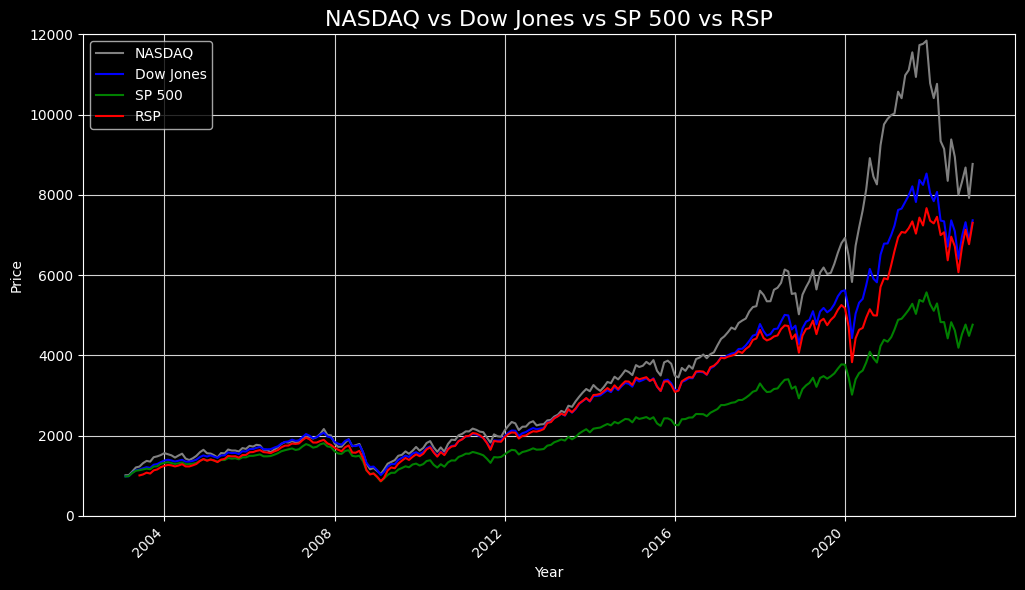

In [24]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(12, 6)
axes.plot(NASDAQ_Premium["Date"], NASDAQ_Premium["NASDAQ Invesment"], color = "grey")
axes.plot(Dow_Jones_Premium["Date"], Dow_Jones_Premium["Dow_Jones Invesment"] , color = "blue")
axes.plot(SP_500_Premium["Date"], SP_500_Premium["SP_500 Invesment"], color = "green")
axes.plot(RSP_Premium["Date"], RSP_Premium["RSP Invesment"], color = "red")


axes.set(title = "NASDAQ vs Dow Jones vs SP 500 vs RSP", xlabel = "Year", ylabel = "Price")
axes.title.set_size(16)
plt.grid(color = "lightgray")
fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes.set_ylim([0,12000])
axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout() #use tight layout
axes.legend(["NASDAQ", "Dow Jones", "SP 500", "RSP"] ,loc = 2) #move legend to right
fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color = "lightgray")
plt.show()

In [25]:
SPY_Premium["SPY Invesment"] = SPY_Premium["Compound Rate"]*1000
IVV_Premium["IVV Invesment"] = IVV_Premium["Compound Rate"]*1000
VTI_Premium["VTI Invesment"] = VTI_Premium["Compound Rate"]*1000
GLD_Premium["GLD Invesment"] = GLD_Premium["Compound Rate"]*1000
XLV_Premium["XLV Invesment"] = XLV_Premium["Compound Rate"]*1000
IWM_Premium["IWM Invesment"] = IWM_Premium["Compound Rate"]*1000

In [26]:
IWM_Premium.describe()

,Date,IWM Premium,Compound Rate,IWM Invesment
count,240,240.000000,240.000000,240.000000
mean,2013-01-15 03:30:00,0.009610,3.403589,3403.588809
min,2003-02-01 00:00:00,-0.217796,0.969828,969.828011
25%,2008-01-24 06:00:00,-0.021998,1.960229,1960.229055
50%,2013-01-16 12:00:00,0.016359,2.767089,2767.088623
75%,2018-01-08 18:00:00,0.044261,4.854468,4854.467563
max,2023-01-01 00:00:00,0.182442,7.877863,7877.862758
std,NaN,0.056958,1.793682,1793.681802


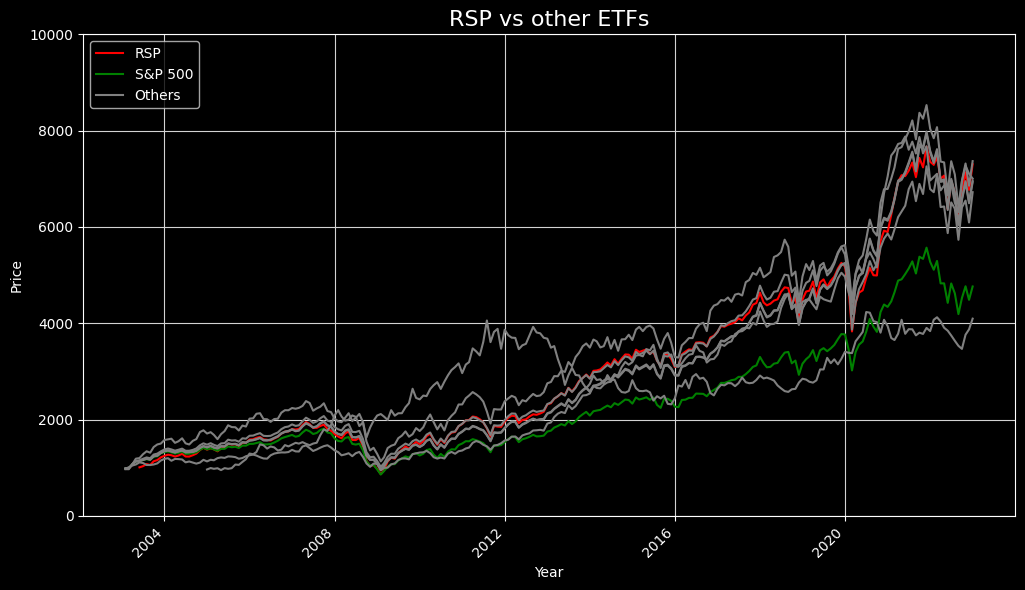

In [27]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(12, 6)

axes.plot(RSP_Premium["Date"], RSP_Premium["RSP Invesment"], color = "red")

axes.plot(SP_500_Premium["Date"], SP_500_Premium["SP_500 Invesment"], color = "green")

axes.plot(SPY_Premium["Date"], SPY_Premium["SPY Invesment"], color = "grey")
axes.plot(IVV_Premium["Date"], IVV_Premium["IVV Invesment"], color = "grey")
axes.plot(VTI_Premium["Date"], VTI_Premium["VTI Invesment"], color = "grey")
axes.plot(GLD_Premium["Date"], GLD_Premium["GLD Invesment"], color = "grey")
axes.plot(XLV_Premium["Date"], XLV_Premium["XLV Invesment"], color = "grey")
axes.plot(IWM_Premium["Date"], IWM_Premium["IWM Invesment"], color = "grey")



axes.set(title = "RSP vs other ETFs", xlabel = "Year", ylabel = "Price")
axes.title.set_size(16)
plt.grid(color = "lightgray")
fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes.set_ylim([0,10000])
axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout() #use tight layout
axes.legend(["RSP", "S&P 500", "Others"] ,loc = 2) #move legend to right

fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color = "lightgray")
plt.show()

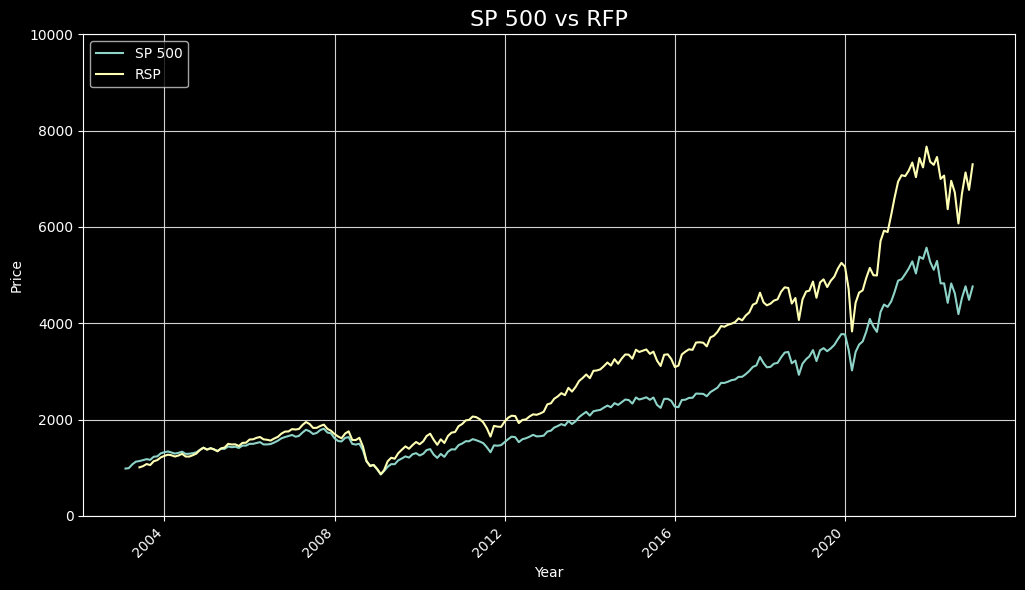

In [28]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(12, 6)

axes.plot(SP_500_Premium["Date"], SP_500_Premium["SP_500 Invesment"])
axes.plot(RSP_Premium["Date"], RSP_Premium["RSP Invesment"])




axes.set(title = "SP 500 vs RFP", xlabel = "Year", ylabel = "Price")
axes.title.set_size(16)
plt.grid(color = "lightgray")
fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes.set_ylim([0,10000])
axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout() #use tight layout
axes.legend(["SP 500", "RSP"] ,loc = 2) #move legend to right

fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color = "lightgray")
plt.show()

In [29]:
NASDAQ_Premium.describe()

,Date,NASDAQ Premium,Compound Rate,NASDAQ Invesment
count,240,240.000000,240.000000,240.000000
mean,2013-01-15 03:30:00,0.010414,3.783660,3783.660381
min,2003-02-01 00:00:00,-0.177319,1.012575,1012.574653
25%,2008-01-24 06:00:00,-0.017858,1.709490,1709.489973
50%,2013-01-16 12:00:00,0.015130,2.385598,2385.597679
75%,2018-01-08 18:00:00,0.042432,5.256531,5256.531461
max,2023-01-01 00:00:00,0.154472,11.844084,11844.084246
std,NaN,0.051394,2.790483,2790.483168


In [30]:
SP_500_Premium.tail()

,Date,SP_500 Premium,Compound Rate,SP_500 Invesment
235,2022-09-01,-0.093396,4.190277,4190.277043
236,2022-10-01,0.079863,4.524927,4524.926873
237,2022-11-01,0.053753,4.768155,4768.154785
238,2022-12-01,-0.058971,4.486970,4486.969668
239,2023-01-01,0.061753,4.764053,4764.052868


In [31]:
SP_500_Premium.tail()

,Date,SP_500 Premium,Compound Rate,SP_500 Invesment
235,2022-09-01,-0.093396,4.190277,4190.277043
236,2022-10-01,0.079863,4.524927,4524.926873
237,2022-11-01,0.053753,4.768155,4768.154785
238,2022-12-01,-0.058971,4.486970,4486.969668
239,2023-01-01,0.061753,4.764053,4764.052868


In [32]:
SP_500_Premium.describe()

,Date,SP_500 Premium,Compound Rate,SP_500 Invesment
count,240,240.000000,240.000000,240.000000
mean,2013-01-15 03:30:00,0.007446,2.325906,2325.905658
min,2003-02-01 00:00:00,-0.169425,0.859051,859.051088
25%,2008-01-24 06:00:00,-0.015725,1.433551,1433.551496
50%,2013-01-16 12:00:00,0.012173,1.799696,1799.696130
75%,2018-01-08 18:00:00,0.032481,3.088171,3088.170585
max,2023-01-01 00:00:00,0.126844,5.569919,5569.919490
std,NaN,0.042690,1.170636,1170.636193


In [33]:
Dow_Jones_Premium.describe()

,Date,Dow_Jones Premium,Compound Rate,Dow_Jones Invesment
count,240,240.000000,240.000000,240.000000
mean,2013-01-15 03:30:00,0.009362,3.204804,3204.803963
min,2003-02-01 00:00:00,-0.170699,0.984566,984.565682
25%,2008-01-24 06:00:00,-0.015444,1.663813,1663.813282
50%,2013-01-16 12:00:00,0.013937,2.338543,2338.542665
75%,2018-01-08 18:00:00,0.034873,4.491685,4491.685446
max,2023-01-01 00:00:00,0.136952,8.530706,8530.706490
std,NaN,0.044709,1.981000,1980.999902


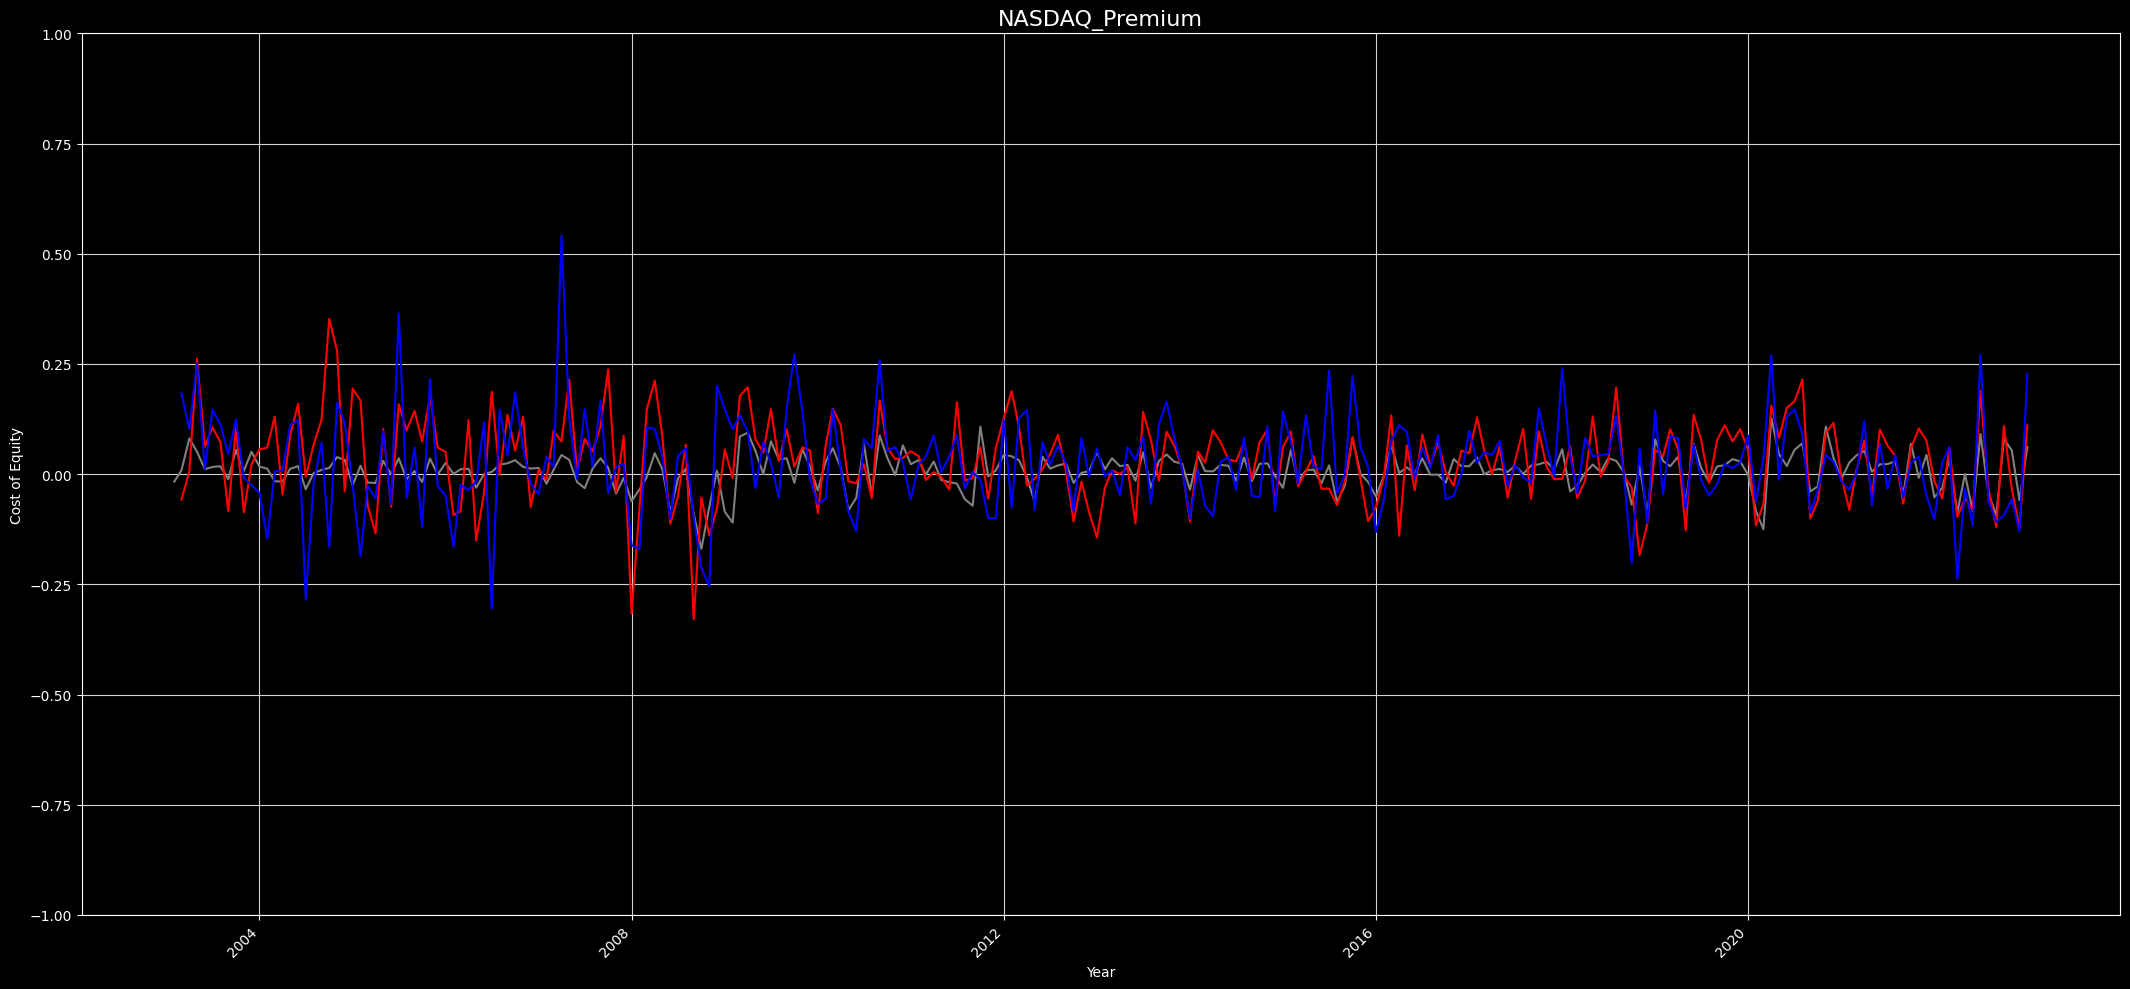

In [34]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(25, 10)
axes.plot(SP_500_Premium["Date"], SP_500_Premium["SP_500 Premium"], color = "grey")
axes.plot(Apple_Premium["Date"], Apple_Premium["Apple Premium"], color = "red")
axes.plot(Amazon_Premium["Date"], Amazon_Premium["Amazon Premium"], color = "blue")


axes.set(title = "NASDAQ_Premium", xlabel = "Year", ylabel = "Cost of Equity")
axes.title.set_size(16)
plt.grid(color = "lightgray")
fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes.set_ylim([-1,1])
axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout() #use tight layout
fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color = "lightgray")
plt.show()

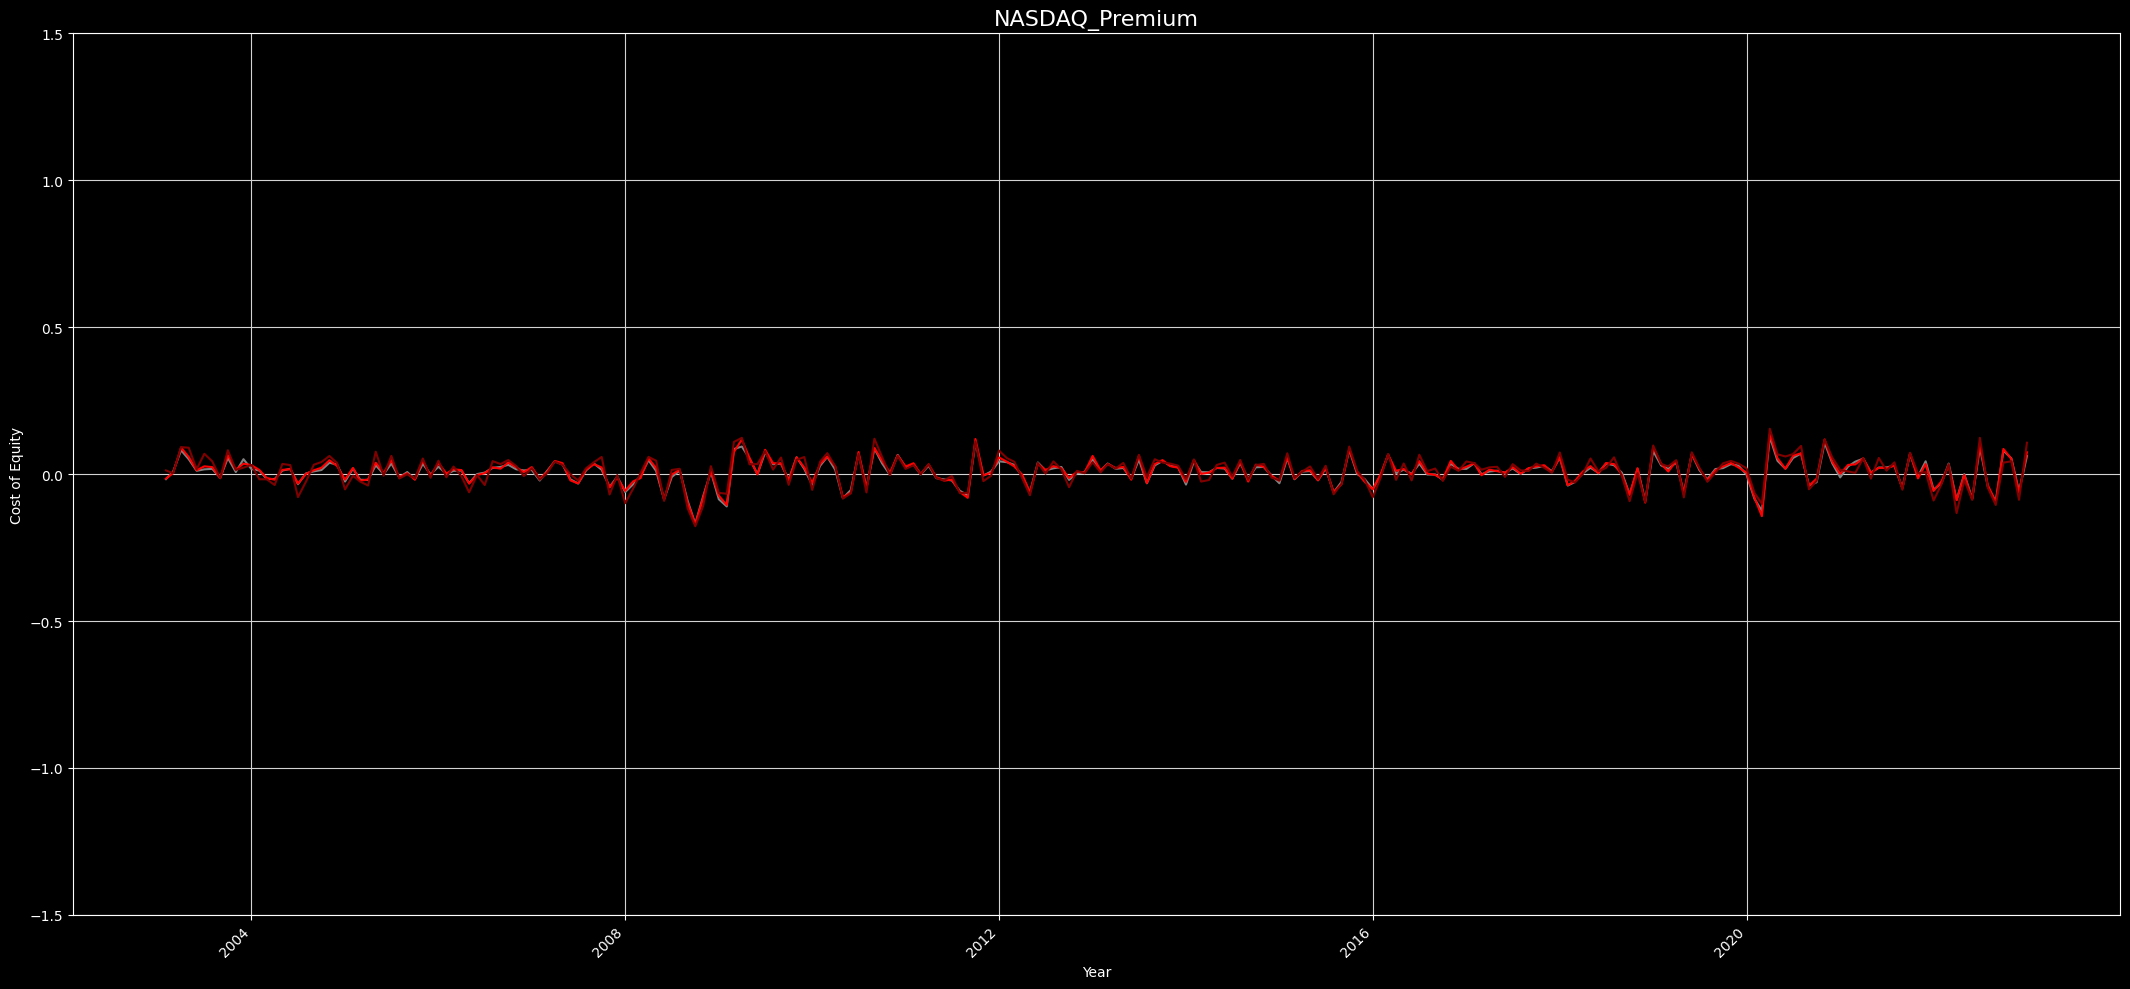

In [35]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(25, 10)
axes.plot(SP_500_Premium["Date"], SP_500_Premium["SP_500 Premium"], color = "grey")
axes.plot(Dow_Jones_Premium["Date"], Dow_Jones_Premium["Dow_Jones Premium"], color = "red")
axes.plot(NASDAQ_Premium["Date"], NASDAQ_Premium["NASDAQ Premium"], color = "maroon")


axes.set(title = "NASDAQ_Premium", xlabel = "Year", ylabel = "Cost of Equity")
axes.title.set_size(16)
plt.grid(color = "lightgray")
fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes.set_ylim([-1.5,1.5])
axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout() #use tight layout
fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color = "lightgray")
plt.show()

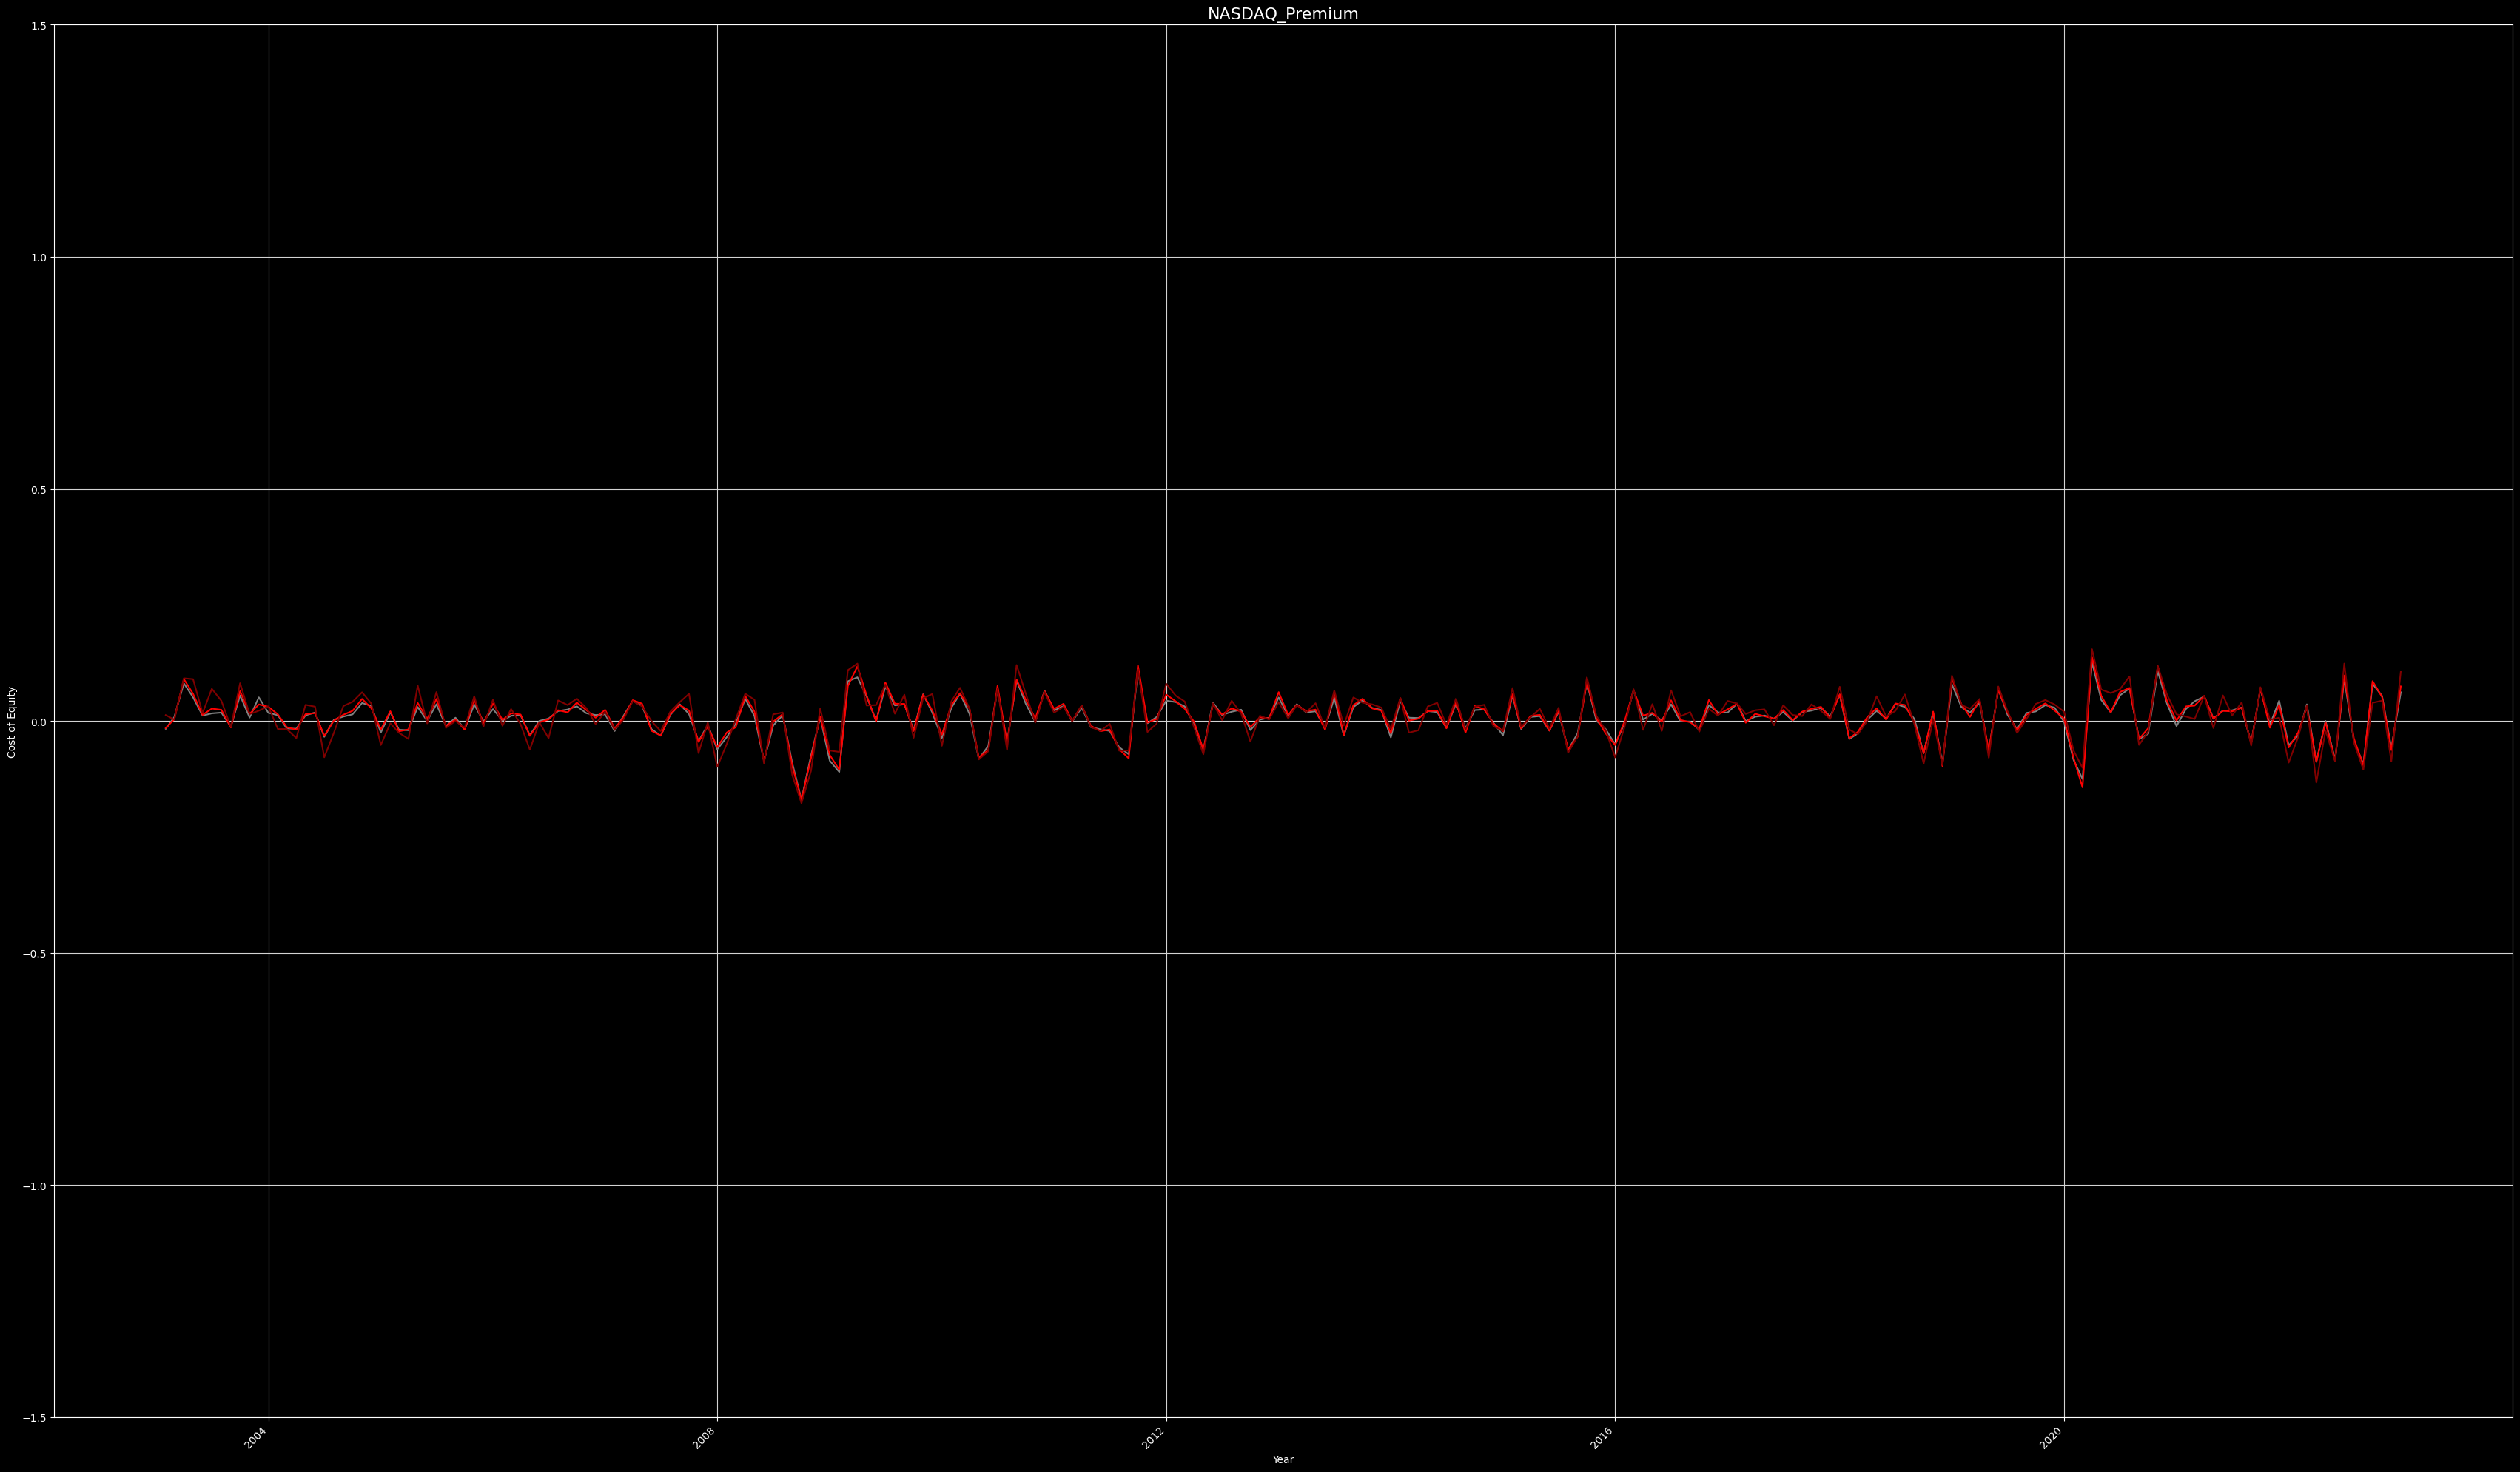

In [36]:
# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(40, 20)
axes.plot(SP_500_Premium["Date"], SP_500_Premium["SP_500 Premium"], color = "grey")
axes.plot(Dow_Jones_Premium["Date"], Dow_Jones_Premium["Dow_Jones Premium"], color = "red")
axes.plot(NASDAQ_Premium["Date"], NASDAQ_Premium["NASDAQ Premium"], color = "maroon")


axes.set(title = "NASDAQ_Premium", xlabel = "Year", ylabel = "Cost of Equity")
axes.title.set_size(16)
plt.grid(color = "lightgray")
fig.autofmt_xdate(rotation=45) #format x-axis as date, rotate 45 degrees
axes.set_ylim([-1.5,1.5])
axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout() #use tight layout
fig.subplots_adjust(right = .85) #adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color = "lightgray")
plt.show()